# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# URL + API_Key (found in files)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# city data list
city_data = []

# Print to logger
print("Success Retrieving Data")
print("-----------------------------")

# counters for cities
record_count = 1
set_count = 1

# all cities in list
for i, city in enumerate(cities):
        
    # group cities
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # log data
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # increase record count with loop
    record_count += 1

    # API request for each of the cities
    try:
        # json data parsed and retrieved
        city_weather = requests.get(city_url).json()

        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # add to city list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    #skip cities that are null
    except:
        print("Skipped.")
        pass
              
# data is finished loading
print("-----------------------------")
print("Data Load Complete     ")
print("-----------------------------")
        
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zhuhai
Processing Record 2 of Set 1 | amderma
City not found. Skipping...
Processing Record 3 of Set 1 | coutances
Processing Record 4 of Set 1 | zheleznodorozhnyy
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | xiamen
Processing Record 12 of Set 1 | norman wells
Processing Record 13 of Set 1 | marienburg
Processing Record 14 of Set 1 | pevek
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | airai
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 1 | parintins
Processing Record 22 of Set 1 | hilo
Processing Record 

Processing Record 34 of Set 4 | nguiu
City not found. Skipping...
Processing Record 35 of Set 4 | poum
Processing Record 36 of Set 4 | buin
Processing Record 37 of Set 4 | yishui
Processing Record 38 of Set 4 | hambantota
Processing Record 39 of Set 4 | mackay
Processing Record 40 of Set 4 | berezanka
Processing Record 41 of Set 4 | ardistan
City not found. Skipping...
Processing Record 42 of Set 4 | svetlogorsk
Processing Record 43 of Set 4 | shemonaikha
Processing Record 44 of Set 4 | kaeo
Processing Record 45 of Set 4 | tuatapere
Processing Record 46 of Set 4 | wageningen
Processing Record 47 of Set 4 | saint george
Processing Record 48 of Set 4 | sarapulka
Processing Record 49 of Set 4 | ayan
Processing Record 0 of Set 5 | rovinj
Processing Record 1 of Set 5 | bowling green
Processing Record 2 of Set 5 | tuktoyaktuk
Processing Record 3 of Set 5 | gold coast
Processing Record 4 of Set 5 | burgeo
Processing Record 5 of Set 5 | coquimbo
Processing Record 6 of Set 5 | kodiak
Processing

Processing Record 20 of Set 8 | nanortalik
Processing Record 21 of Set 8 | katangli
Processing Record 22 of Set 8 | pontal do parana
Processing Record 23 of Set 8 | vilhena
Processing Record 24 of Set 8 | poughkeepsie
Processing Record 25 of Set 8 | palu
Processing Record 26 of Set 8 | naze
Processing Record 27 of Set 8 | vestmannaeyjar
Processing Record 28 of Set 8 | kandrian
Processing Record 29 of Set 8 | kushima
Processing Record 30 of Set 8 | tafresh
Processing Record 31 of Set 8 | baykit
Processing Record 32 of Set 8 | cabedelo
Processing Record 33 of Set 8 | pisco
Processing Record 34 of Set 8 | sedalia
Processing Record 35 of Set 8 | yomitan
City not found. Skipping...
Processing Record 36 of Set 8 | antalaha
Processing Record 37 of Set 8 | sao paulo de olivenca
Processing Record 38 of Set 8 | tautira
Processing Record 39 of Set 8 | pacific grove
Processing Record 40 of Set 8 | lake havasu city
Processing Record 41 of Set 8 | kizukuri
Processing Record 42 of Set 8 | camacupa
Pr

Processing Record 5 of Set 12 | moron
Processing Record 6 of Set 12 | ksenyevka
City not found. Skipping...
Processing Record 7 of Set 12 | kudahuvadhoo
Processing Record 8 of Set 12 | kingsville
Processing Record 9 of Set 12 | mercedes
Processing Record 10 of Set 12 | talnakh
Processing Record 11 of Set 12 | bahraich
Processing Record 12 of Set 12 | tabas
Processing Record 13 of Set 12 | karamea
City not found. Skipping...
Processing Record 14 of Set 12 | calama
Processing Record 15 of Set 12 | prince rupert
Processing Record 16 of Set 12 | oderzo
Processing Record 17 of Set 12 | puerto maldonado
Processing Record 18 of Set 12 | hopelchen
Processing Record 19 of Set 12 | two rivers
Processing Record 20 of Set 12 | ca mau
Processing Record 21 of Set 12 | muskegon
Processing Record 22 of Set 12 | ciudad bolivar
Processing Record 23 of Set 12 | santa quiteria
Processing Record 24 of Set 12 | thibodaux
Processing Record 25 of Set 12 | vila
Processing Record 26 of Set 12 | barra da estiva


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# from json to pd_df
city_data_pd = pd.DataFrame(city_data)

# fields needed
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# data to csv -- in output_data folder
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# num of records
city_data_pd.count()

City          549
Cloudiness    549
Country       549
Date          549
Humidity      549
Lat           549
Lng           549
Max Temp      549
Wind Speed    549
dtype: int64

In [5]:
#dataframe

city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,zhuhai,100,CN,1572980361,80,40.71,112.04,33.80,4.47
1,coutances,20,FR,1572980888,87,49.05,-1.45,54.00,12.75
2,zheleznodorozhnyy,75,RU,1572980820,76,55.75,38.00,54.00,13.42
3,ushuaia,75,AR,1572980305,86,-54.81,-68.31,44.60,21.92
4,qaanaaq,49,GL,1572980305,63,77.48,-69.36,4.41,9.48


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

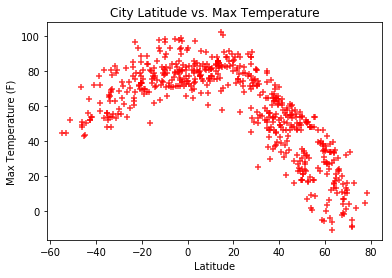

In [30]:
# scatter for latitude v. temperature
plt.scatter(lats, 
            max_temps,
            color="red", linewidths=1, marker="+", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/latvtemp.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

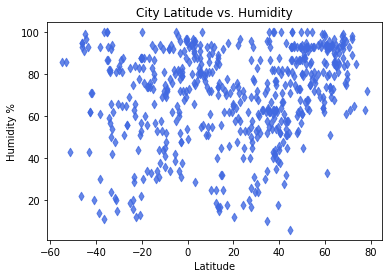

In [29]:
# scatter for latitude v. humidity
plt.scatter(lats, 
           humidity,
            color="royalblue", linewidths=1, marker="d", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/latvhumid.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

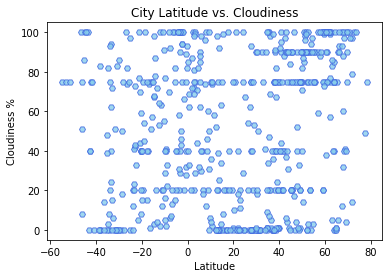

In [28]:
# scatter for latitude v. clouds
plt.scatter(lats, 
           cloudiness,
            color="skyblue", edgecolor="royalblue", linewidths=1, marker="H", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/latvclouds.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

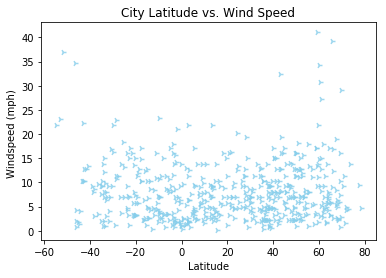

In [27]:
# scatter for latitude v. clouds
plt.scatter(lats, 
           wind_speed,
            color="skyblue", edgecolor="royalblue", linewidths=1, marker="4", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Windspeed (mph) ")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/latvwind.png")

# Show plot
plt.show()